# Analisando dados do Fifa 22

Buscamos uma relação entre o overall, potencial e valor de mercado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fifa22 = pd.read_csv('FIFA22/players_22.csv', index_col = 'short_name')
pd.set_option('display.max_columns', None)
fifa22.head()

C:\Users\mateu\AppData\Local\Temp\ipykernel_7364\161347839.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa22 = pd.read_csv('FIFA22/players_22.csv', index_col = 'short_name')


,sofifa_id,player_url,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,158023,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
R. Lewandowski,188545,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
Cristiano Ronaldo,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.so

In [3]:
fifa22.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

Alguns valores estão faltando, por exemplo, na coluna value_eur temos 19165 valores, mas temos 19239 jogadores, o mesmo ocorre para os salários. 

In [4]:
fifa22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19239 entries, L. Messi to E. Lalchhanchhuaha
Columns: 109 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(49)
memory usage: 16.1+ MB


In [5]:
dados1 = pd.DataFrame(fifa22.loc[:][['overall','potential','value_eur','wage_eur']].copy())

In [6]:
dados1.head()

,overall,potential,value_eur,wage_eur
short_name,,,,
L. Messi,93,93,78000000.0,320000.0
R. Lewandowski,92,92,119500000.0,270000.0
Cristiano Ronaldo,91,91,45000000.0,270000.0
Neymar Jr,91,91,129000000.0,270000.0
K. De Bruyne,91,91,125500000.0,350000.0


In [7]:
dados = dados1.dropna()
dados.head()

,overall,potential,value_eur,wage_eur
short_name,,,,
L. Messi,93,93,78000000.0,320000.0
R. Lewandowski,92,92,119500000.0,270000.0
Cristiano Ronaldo,91,91,45000000.0,270000.0
Neymar Jr,91,91,129000000.0,270000.0
K. De Bruyne,91,91,125500000.0,350000.0


In [8]:
dados.isnull().value_counts()

overall  potential  value_eur  wage_eur
False    False      False      False       19165
dtype: int64

In [9]:
from pandas.plotting import scatter_matrix

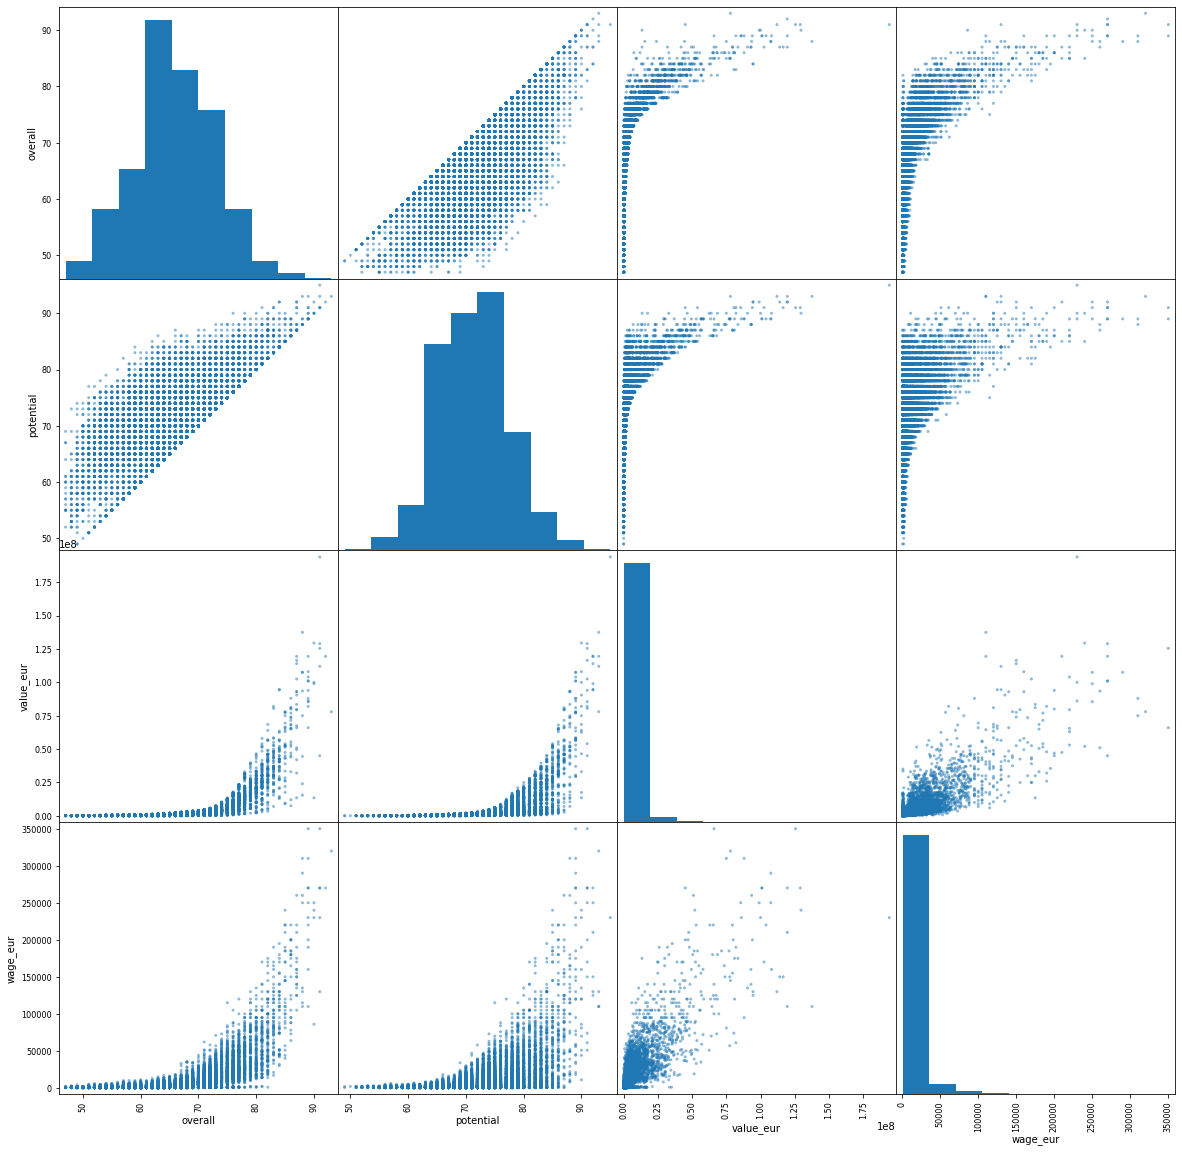

In [10]:
scatter_matrix(dados, figsize = (20,20), alpha = 0.5)
plt.show()

In [11]:
corr_matrix = dados.corr()

In [12]:
corr_matrix

,overall,potential,value_eur,wage_eur
overall,1.000000,0.644215,0.554684,0.601886
potential,0.644215,1.000000,0.527738,0.497686
value_eur,0.554684,0.527738,1.000000,0.823527
wage_eur,0.601886,0.497686,0.823527,1.000000


In [13]:
valor = np.array(dados.loc[:,'value_eur'].copy())

In [14]:
log_valor = np.log(valor)

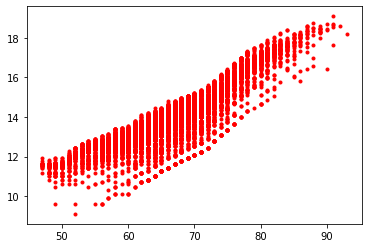

In [15]:
plt.plot(dados.loc[:]['overall'], log_valor, 'r.')
plt.show()

Agora os dados podem ser encaixados em uma reta.

# Treinando modelo para overall e log do valor do jogador

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR 
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dados.iloc[:]['overall']), log_valor, test_size = 0.20)

In [18]:
lin_reg = LinearRegression()
svm_reg = LinearSVR()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
np.arange(0,5,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [21]:
param_grid = {'epsilon':np.arange(0,5,0.2)}
grid_cv = GridSearchCV(svm_reg,param_grid, cv=5)

In [22]:
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [23]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5780763633386625

In [26]:
a1, b1 = lin_reg.coef_, lin_reg.intercept_
a1,b1

(array([0.15808951]), 3.490296478551409)

# Treinando o modelo SVM

In [27]:
grid_cv.fit(X_train.reshape(-1,1),y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'epsilon': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])})

In [28]:
grid_cv.best_params_

{'epsilon': 0.6000000000000001}

In [29]:
y_predict = grid_cv.best_estimator_.predict(X_test.reshape(-1,1))

In [30]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.586700966260422

o modelo de LinearRegression saiu-se melhor que o SVM.

In [31]:
a2,b2 = grid_cv.best_estimator_.coef_, grid_cv.best_estimator_.intercept_
a2,b2

(array([0.16667699]), array([2.83177717]))

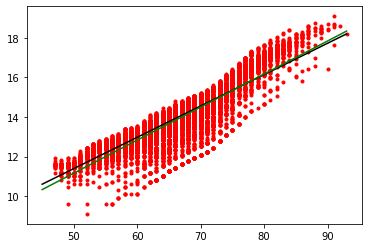

In [32]:
plt.plot(dados.loc[:]['overall'], log_valor, 'r.', [45,93],[a1[0]*45+b1,a1[0]*93+b1],'k-',[45,93],[a2[0]*45+b2[0],a2[0]*93+b2[0]], 'g-')
plt.show()

# Modelo tridimensional

Pelos gráficos anteriores, podemos desconfiar que existe uma relação linear entre overall, potential e log(valor do jogador).

In [34]:
from mpl_toolkits import mplot3d

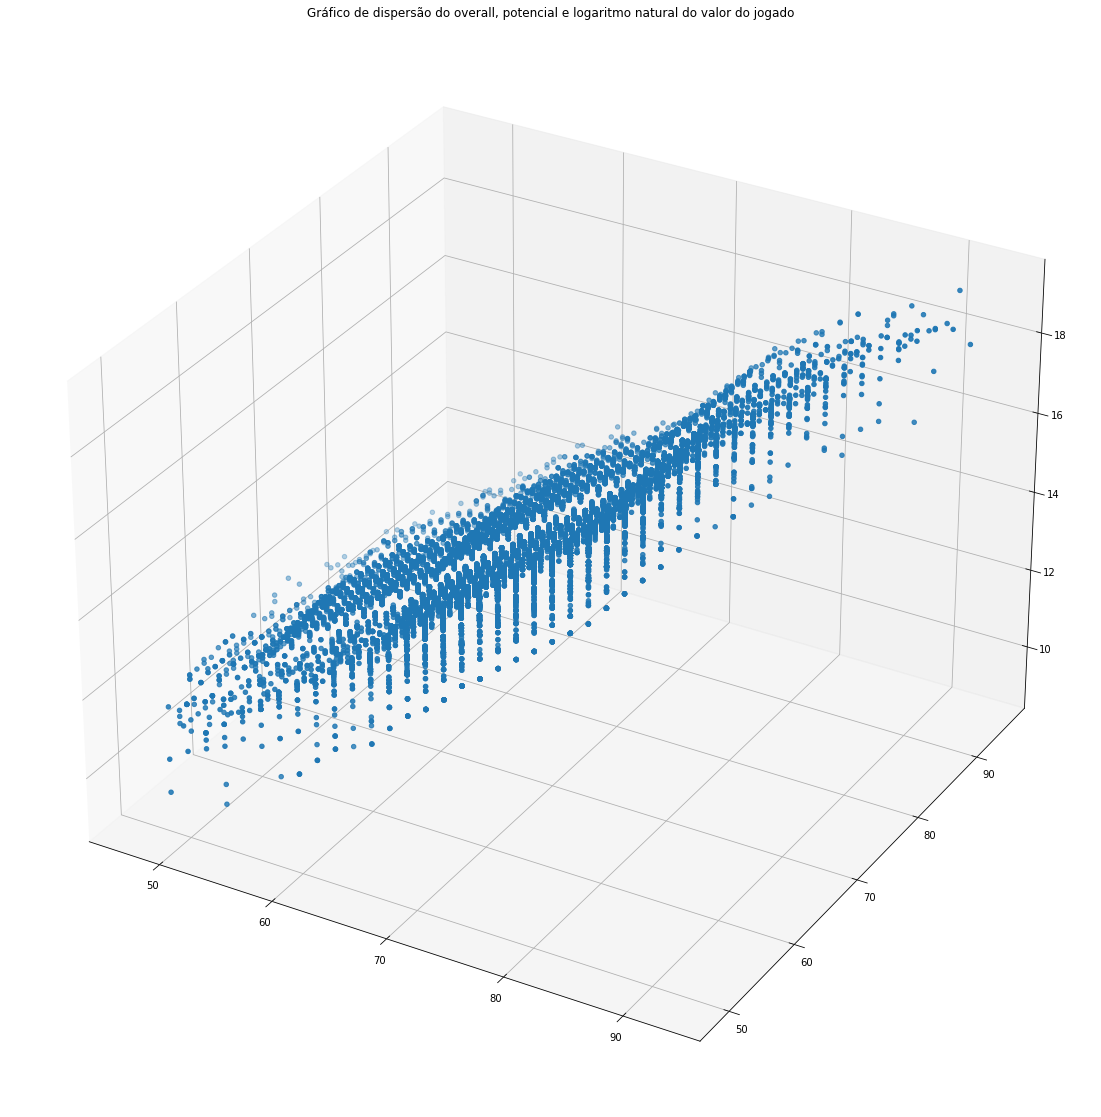

In [36]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
ax.scatter(dados.loc[:]['overall'], dados.loc[:,'potential'], log_valor)

ax.set_title('Gráfico de dispersão do overall, potencial e logaritmo natural do valor do jogado')
plt.show()

visivelmente, os dados encaixam-se em uma reta. Vamos tentar fitá-la.

In [38]:
X = np.array(dados.loc[:][['overall','potential']])
X

array([[93, 93],
       [92, 92],
       [91, 91],
       ...,
       [47, 55],
       [47, 60],
       [47, 60]], dtype=int64)

In [39]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, log_valor, test_size = 0.20)

In [40]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train1, y_train1)

LinearRegression()

In [42]:
svm_reg1 = LinearSVR()
grid_cv1 = GridSearchCV(svm_reg1, param_grid, cv=3)

In [56]:
grid_cv1.fit(X_train1, y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=3, estimator=LinearSVR(),
             param_grid={'epsilon': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])})

In [57]:
grid_cv1.best_estimator_

LinearSVR(epsilon=0.2)

In [63]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = None, eta0=0.2)
paramns_grid1 = {'max_iter': np.arange(150,300, 2)}
grid_cv2 = GridSearchCV(sgd_reg, paramns_grid1, cv = 5)

In [64]:
grid_cv2.fit(X_train1, y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

GridSearchCV(cv=5, estimator=SGDRegressor(eta0=0.2, penalty=None),
             param_grid={'max_iter': array([150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252,
       254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278,
       280, 282, 284, 286, 288, 290, 292, 294, 296, 298])})

In [65]:
grid_cv2.best_estimator_

SGDRegressor(eta0=0.2, max_iter=164, penalty=None)

In [66]:
for x in (lin_reg1, grid_cv1.best_estimator_, grid_cv2.best_estimator_):
    y_pred = x.predict(X_test1)
    print(f'O valor do erro médio para {x.__class__} é {np.sqrt(mean_squared_error(y_test1,y_pred))}')

O valor do erro médio para <class 'sklearn.linear_model._base.LinearRegression'> é 0.37246588433001127
O valor do erro médio para <class 'sklearn.svm._classes.LinearSVR'> é 0.3989174643210172
O valor do erro médio para <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> é 28675975193153.973


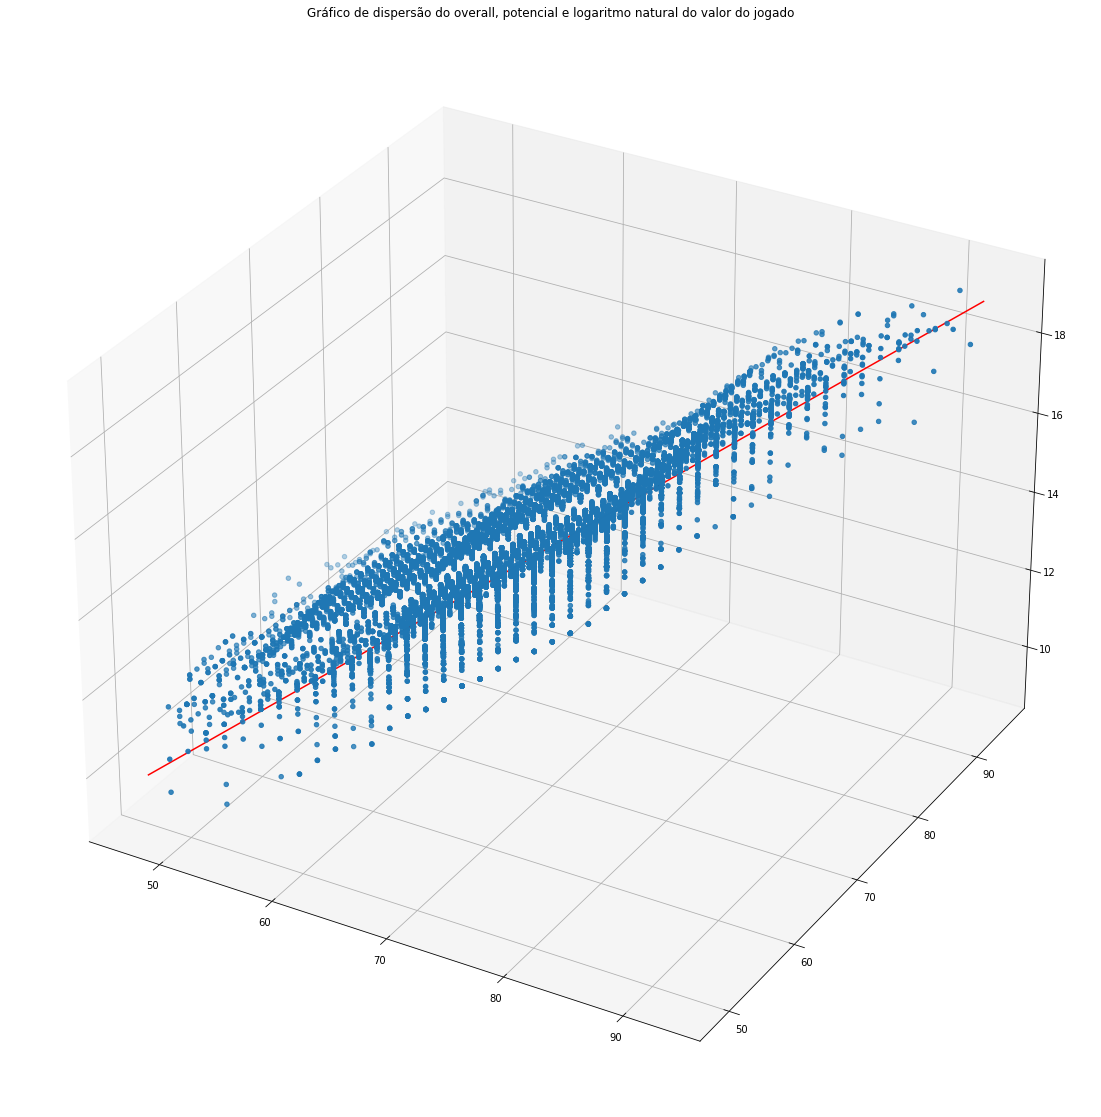

In [85]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
ax.scatter(dados.loc[:]['overall'], dados.loc[:,'potential'], log_valor)
R = np.array([[X[:,0].min(),X[:,1].min()],[X[:,0].max(),X[:,1].max()]])
ax.plot3D(R[:,0],R[:,1], lin_reg1.predict(R),'r')

ax.set_title('Gráfico de dispersão do overall, potencial e logaritmo natural do valor do jogado')
plt.show()